<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


/var/folders/wj/cxf17t_96xj_yhwgjxd90x9m0000gn/T/ipykernel_19982/1760202900.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Outcome", palette="crest")


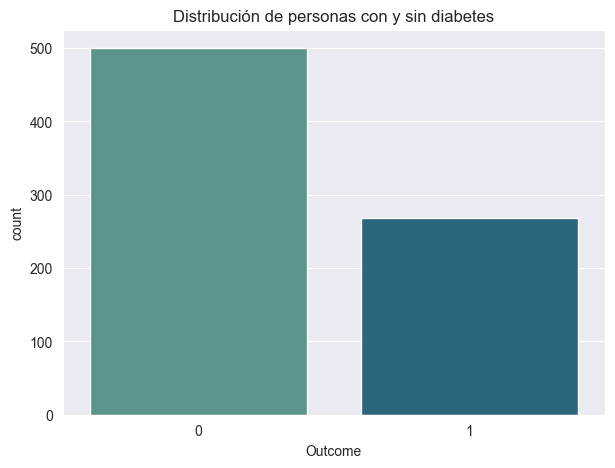

Precisión Regresión Logística: 0.7532467532467533
Precisión KNN: 0.6948051948051948
Precisión Árbol de Decisión: 0.7922077922077922
Precisión SVM: 0.7337662337662337


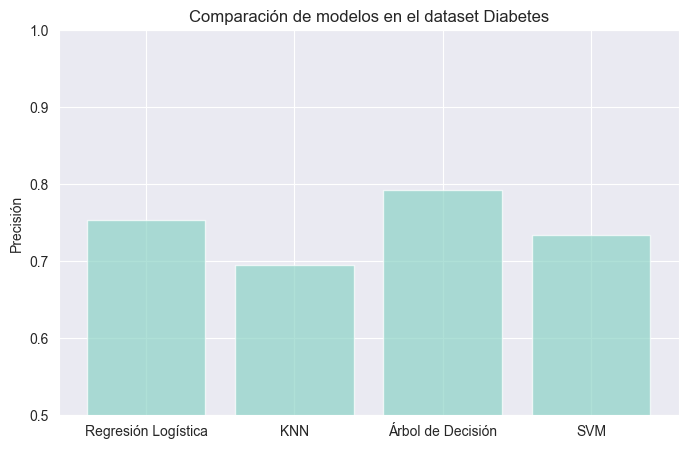

Introduce valores para predecir diabetes:


FloatText(value=0.0, description='Pregnancies')

FloatText(value=0.0, description='Glucose')

FloatText(value=0.0, description='BloodPressure')

FloatText(value=0.0, description='SkinThickness')

FloatText(value=0.0, description='Insulin')

FloatText(value=0.0, description='BMI')

FloatText(value=0.0, description='DiabetesPedigreeFunction')

FloatText(value=0.0, description='Age')

Button(description='Predecir', style=ButtonStyle())

In [1]:
# ======================================================
#   NOTEBOOK: Predicción de Diabetes (Pima Indians)
# ======================================================

# -----------------------------
#   Imports y configuración
# -----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

sns.set_style("darkgrid")

# -----------------------------
#   Cargar dataset
# -----------------------------
# El dataset de diabetes en sklearn NO es binario.
# Así que usaremos otro muy conocido: Diabetes Pima (UCI)
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

df.head()

# Vista general del dataset
df.info()
df.describe()

# Visualización simple
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Outcome", palette="crest")
plt.title("Distribución de personas con y sin diabetes")
plt.show()



X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalizar (muy importante para este dataset)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Modelos
models = {
    "Regresión Logística": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(5),
    "Árbol de Decisión": DecisionTreeClassifier(max_depth=5),
    "SVM": SVC(kernel="rbf")
}

scores = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    scores[name] = accuracy_score(y_test, preds)
    print(f"Precisión {name}: {scores[name]}")



plt.figure(figsize=(8,5))
plt.bar(scores.keys(), scores.values(), alpha=0.7)
plt.ylim(0.5, 1)
plt.ylabel("Precisión")
plt.title("Comparación de modelos en el dataset Diabetes")
plt.show()



# Tomamos el modelo mejor (Árbol de decisión o Logística normalmente)
best_model = DecisionTreeClassifier(max_depth=5)
best_model.fit(X_train_scaled, y_train)

print("Introduce valores para predecir diabetes:")

fields = list(X.columns)
inputs = []

for f in fields:
    w = widgets.FloatText(description=f)
    inputs.append(w)
    display(w)

btn = widgets.Button(description="Predecir")

def on_click(b):
    values = [w.value for w in inputs]
    scaled = scaler.transform([values])
    pred = best_model.predict(scaled)[0]
    print("\nResultado: ", "Tiene diabetes" if pred == 1 else "No tiene diabetes")

btn.on_click(on_click)
display(btn)
